In [1]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import framenet as fn
import pandas as pd
import seaborn as sns

nltk.download("wordnet")
nltk.download("framenet_v17")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ryanschaefer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package framenet_v17 to
[nltk_data]     /Users/ryanschaefer/nltk_data...
[nltk_data]   Package framenet_v17 is already up-to-date!


True

# Lexical Units

In [2]:
lexical_units = fn.lus()
lu_names = list(set(map(lambda x: x.name, lexical_units)))

print("Total unique lexical units: {}".format(len(lu_names)))

Total unique lexical units: 10462


In [3]:
lu_frames = { key: set() for key in lu_names }
    
for lu in lexical_units:
    lu_frames[lu.name].add(lu.frame.name)
    
multi_frame_units = []
for name, frames in lu_frames.items():
    if len(frames) > 1:
        multi_frame_units.append(name)
    
print("Lexical units with more than 1 frame: {}".format(len(multi_frame_units)))

Lexical units with more than 1 frame: 1987


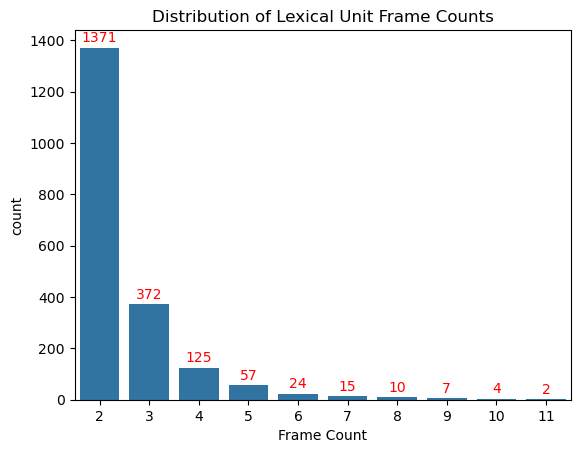

In [40]:
df_lu = pd.DataFrame({
    "Lexical Unit": multi_frame_units,
    "Frame Count": list(map(lambda x: len(lu_frames[x]), multi_frame_units))
})

sns.countplot(df_lu, x = "Frame Count")
plt.title("Distribution of Lexical Unit Frame Counts")

counts = df_lu["Frame Count"].value_counts()
for i, cnt in enumerate(counts):
    plt.annotate(
        str(cnt),
        (i, cnt),
        textcoords = "offset points",
        xytext = (0, 4),
        ha = "center",
        color = "red"
    )

plt.show()

In [41]:
df_lu["Frame"] = list(map(lambda x: list(lu_frames[x]), multi_frame_units))
df_lu = df_lu.explode("Frame", ignore_index = True)

df_lu

,Lexical Unit,Frame Count,Frame
0,act.v,3,Conduct
1,act.v,3,Intentionally_act
2,act.v,3,Performers_and_roles
3,coat.v,2,Filling
4,coat.v,2,Distributed_position
...,...,...,...
5092,exercise.n,3,Exercising
5093,exercise.n,3,Rite
5094,exercise.n,3,Practice
5095,reaction.n,2,Communication_response


In [6]:
all_sentences = []

for i, row in df_lu.iterrows():
    lexical_unit = row["Lexical Unit"]
    frame = row["Frame"]
    sentences = []
    for lu in fn.lus(lexical_unit, frame):
        for sentence in lu.exemplars:
            sentences.append(sentence.text)
    all_sentences.append(sentences)

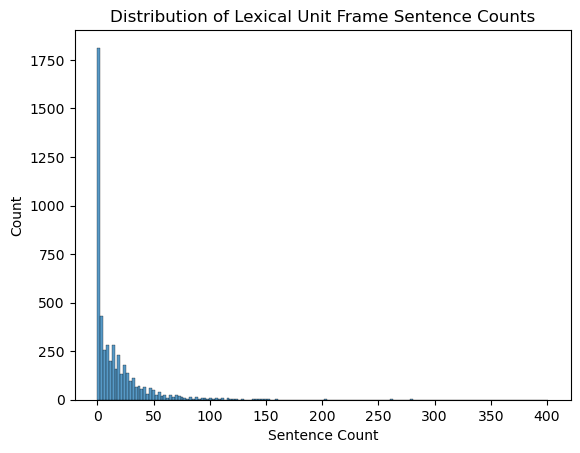

In [42]:
df_lu["Sentence Count"] = list(map(lambda x: len(x), all_sentences))

sns.histplot(df_lu, x = "Sentence Count")
plt.title("Distribution of Lexical Unit Frame Sentence Counts")

plt.show()

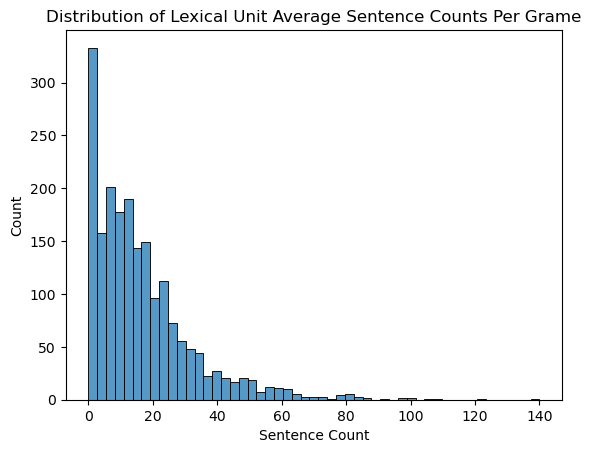

In [43]:
df_lu_grp = df_lu.groupby("Lexical Unit").mean(numeric_only = True).reset_index()

sns.histplot(df_lu_grp, x = "Sentence Count")
plt.title("Distribution of Lexical Unit Average Sentence Counts Per Grame")

plt.show()

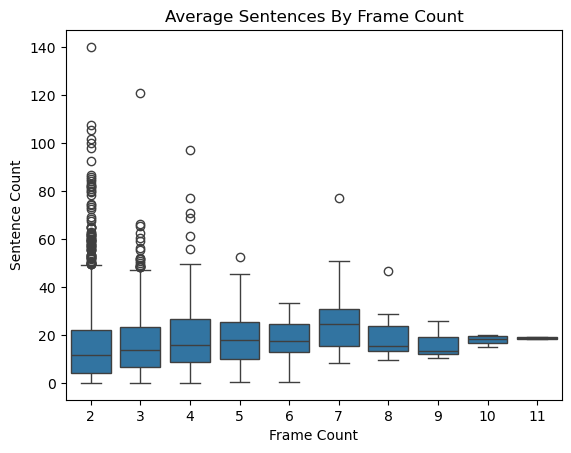

In [44]:
df_lu_grp["Frame Count"] = df_lu_grp["Frame Count"].astype(int)

sns.boxplot(df_lu_grp, x = "Frame Count", y = "Sentence Count")
plt.title("Average Sentences By Frame Count")

plt.show()

In [45]:
df_lu_grp.groupby("Frame Count").describe()

Sentence Count                                              \
                     count       mean        std        min        25%   
Frame Count                                                              
2                   1371.0  16.086069  16.936611   0.000000   4.000000   
3                    372.0  16.858423  14.684247   0.000000   6.666667   
4                    125.0  19.706000  16.181620   0.000000   8.750000   
5                     57.0  19.171930  11.645566   0.400000  10.000000   
6                     24.0  18.312500   8.910222   0.333333  13.041667   
7                     15.0  26.780952  17.793918   8.142857  15.357143   
8                     10.0  19.812500  11.216811   9.500000  13.343750   
9                      7.0  16.000000   6.113468  10.333333  11.944444   
10                     4.0  17.900000   2.198484  15.100000  16.675000   
11                     2.0  18.727273   0.642824  18.272727  18.500000   

                                               
                   50%        75%         max  
Frame Count                                    
2            11.500000  22.000000  140.000000  
3            13.666667  23.333333  121.000000  
4            16.000000  26.750000   97.000000  
5            18.000000  25.200000   52.400000  
6            17.416667  24.666667   33.500000  
7            24.428571  31.000000   77.000000  
8            15.250000  23.875000   46.750000  
9            13.444444  19.277778   25.777778  
10           18.350000  19.575000   19.800000  
11           18.727273  18.954545   19.181818

In [46]:
df_lu["Sentence"] = all_sentences
df_lu = df_lu.explode("Sentence")
df_lu.to_csv("../datasets/lexical_unit_sentences.csv", index = False)

df_lu

,Lexical Unit,Frame Count,Frame,Sentence Count,Sentence
0,act.v,3,Conduct,66,"At times , especially following the leakage of..."
0,act.v,3,Conduct,66,The Lord Chancellor will be given power to mak...
0,act.v,3,Conduct,66,Mr Shephard would like legislation to make sur...
0,act.v,3,Conduct,66,"In one case , the Appeal Court found a local a..."
0,act.v,3,Conduct,66,"Since that was highlighted , several witnesses..."
...,...,...,...,...,...
5094,exercise.n,3,Practice,29,Prowler jet on a low - flying exercise from th...
5094,exercise.n,3,Practice,29,"A cow is blown up during an exercise , and the..."
5095,reaction.n,2,Communication_response,0,NaN
5096,reaction.n,2,Response,2,"However , the program has been restarted , pos..."


# Frame Elements

In [24]:
frame_elements = set()

for frame in fn.frames():
    for elem in frame.FE.values():
        frame_elements.add(elem.name)
        
frame_elements = list(frame_elements)
print("Total unique frame elements: {}".format(len(frame_elements)))

Total unique frame elements: 1285


In [35]:
fe_sentences = { key: [] for key in frame_elements }

for frame in fn.frames():
    for elem in frame.FE.values():
        for lu in frame.lexUnit.values():
            for sentence in lu.exemplars:
                for annotation_set in sentence.annotationSet:
                    if annotation_set.layer:
                        for layer in annotation_set.layer:
                            if layer.name == "FE":
                                for x in layer.label:
                                    if x.name == elem.name:
                                        fe_sentences[elem.name].append(sentence.text)

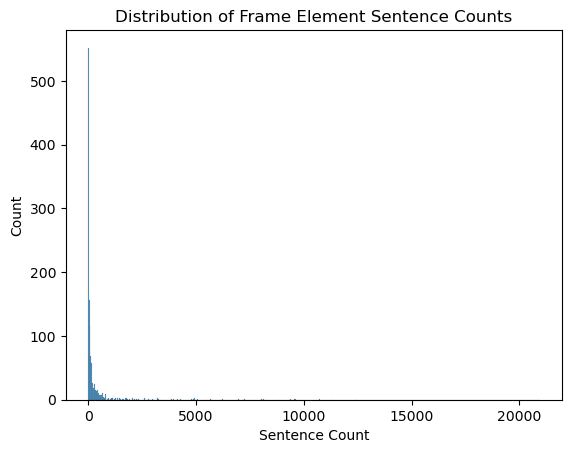

In [38]:
df_fe = pd.DataFrame({
    "Frame Element": list(frame_elements),
    "Sentence Count": list(map(lambda x: len(fe_sentences[x]), frame_elements))
})

sns.histplot(df_fe, x = "Sentence Count")
plt.title("Distribution of Frame Element Sentence Counts")

plt.show()

In [39]:
df_fe["Sentence"] = list(map(lambda x: list(fe_sentences[x]), frame_elements))
df_fe = df_fe.explode("Sentence")
df_fe.to_csv("../datasets/frame_element_sentences.csv", index = False)

df_fe

,Frame Element,Sentence Count,Sentence
0,Anchor,5,"At this village near Wedmore , less well known..."
0,Anchor,5,"Modelled on its Princeton namesake , it is fun..."
0,Anchor,5,"Unlike its Scottish namesake , Leven is not by..."
0,Anchor,5,This time the building was in stone and was a ...
0,Anchor,5,Mr Coleman is as diffident as his television n...
...,...,...,...
1284,Sides,346,"We are neutral between Copts and Moslems . """
1284,Sides,346,"Clearly , conscious processes are central to a..."
1284,Sides,346,The conflict which some people see between the...
1284,Sides,346,"Now this would be unthinkable in Britain , bec..."
